In [ ]:
# !pip3 install matplotlib
# !pip3 install pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [50, 35]
plt.rcParams['figure.dpi'] = 100



In [2]:
import glob
import os

list_of_files = glob.glob('./data/*.csv') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)
df3 = pd.read_csv(latest_file)
df3.loc[df3["result"].str.startswith("ThreadPanic: 'Cyclic graph"), 'result'] = "Cyclic graph"
df3.loc[df3["result"].str.startswith("ThreadPanic: 'Could not find file:"), 'result'] = "Could not find file"
df4 = df3.groupby("result").count()
df4["percent"] = df4["bytecode_hash"] / len(df3.index) * 100
df4 = df4.sort_values("percent", ascending=False)
df5 = df4#[df4['percent'] > .25]
df5.plot.pie(y="percent", autopct='%.2f%%')
df3 = df3[df3["result"] != "Success"]
# df3 = df3[df3["result"] != "PerformanceTimeout"]

./data/results_07-10_16-54.csv


<Axes: ylabel='percent'>

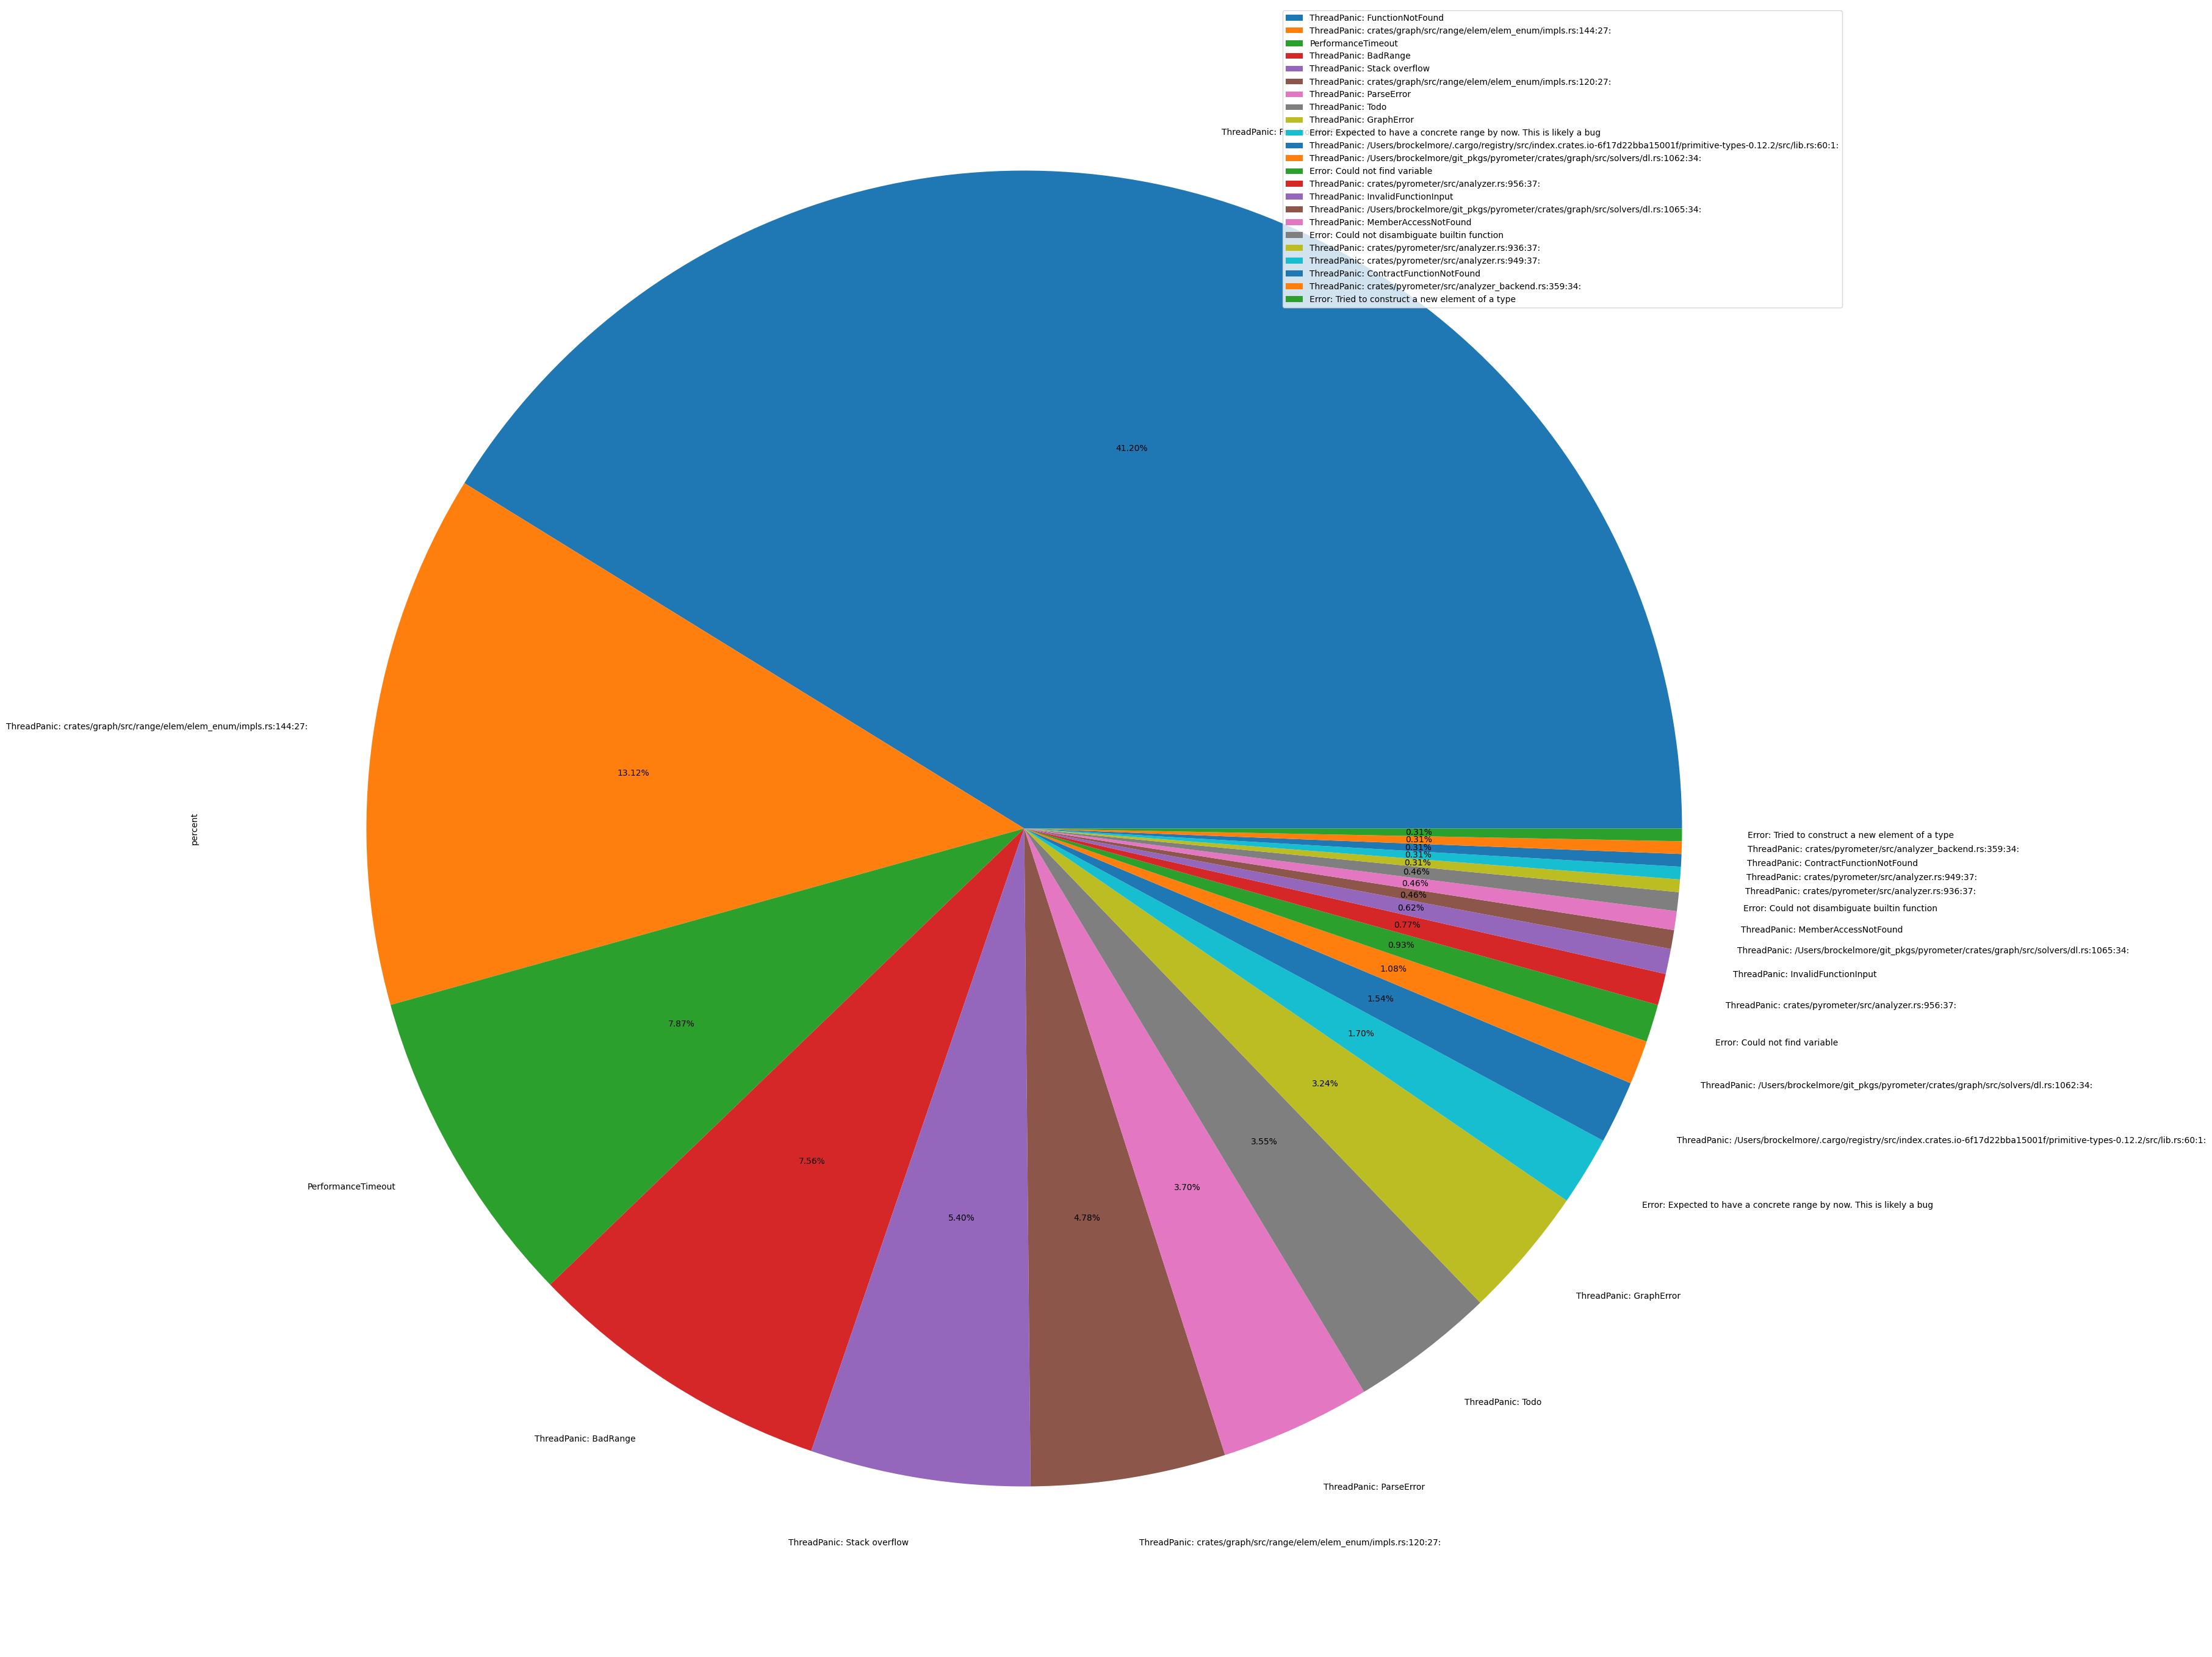

In [3]:
df4 = df3.groupby("result").count()
df4["percent"] = df4["bytecode_hash"] / len(df3.index) * 100
df4 = df4.sort_values("percent", ascending=False)
df5 = df4[df4['percent'] > .25]
df5.plot.pie(y="percent", autopct='%.2f%%')

In [4]:
df4 = df4.reset_index()
df4

,result,bytecode_hash,time (sec),source_type,source_size,percent
0,ThreadPanic: FunctionNotFound,267,267,267,267,40.271493
1,ThreadPanic: crates/graph/src/range/elem/elem_...,85,85,85,85,12.820513
2,PerformanceTimeout,51,51,51,51,7.692308
3,ThreadPanic: BadRange,49,49,49,49,7.390649
4,ThreadPanic: Stack overflow,35,35,35,35,5.279035
5,ThreadPanic: crates/graph/src/range/elem/elem_...,31,31,31,31,4.675716
6,ThreadPanic: ParseError,24,24,24,24,3.619910
7,ThreadPanic: Todo,23,23,23,23,3.469080
8,ThreadPanic: GraphError,21,21,21,21,3.167421
9,Error: Expected to have a concrete range by no...,11,11,11,11,1.659125


In [5]:
idx = 0

most_common = df4.iloc[idx]["result"]

def smallest(res):
    range_df = df3[df3["result"] == res].reset_index(drop=True)
    single_range_df = range_df #[range_df["source_type"] == "SingleFile"].reset_index(drop=True)
    single_range_df = single_range_df.sort_values("source_size").reset_index(drop=True)
    if len(single_range_df.index) == 0:
        print("Non-single file")
        single_range_df = range_df[range_df["source_type"] == "JSON"].reset_index(drop=True)
        single_range_df = single_range_df.sort_values("source_size").reset_index(drop=True)
    return single_range_df

single_range_df = smallest(df4.iloc[idx]["result"])
print(single_range_df["bytecode_hash"][6], single_range_df["source_size"][0], df4.iloc[idx]["result"])

599ce674b3f42cfd22a47ca6721679fa806eb6830d8be16b4c121f7adbc6e42b 5009 ThreadPanic: FunctionNotFound


In [6]:
df4.iloc[0]["result"]

'ThreadPanic: FunctionNotFound'

In [7]:
num = 0
print(single_range_df["bytecode_hash"][num], single_range_df["source_size"][num], most_common)

61d720115a00a668fc70f56a88cd983fcc4e2886478e16121c70a5c08425787d 5009 ThreadPanic: FunctionNotFound
